[View in Colaboratory](https://colab.research.google.com/github/lrdshiva/home_made-multi_class_perceptron/blob/master/indiginous_perceptron.ipynb)

# Perceptron
###by Amarnath De



*   **What is a perceptron?**
        A Perceptron in a Linear Binary Classifier that trains itself through supervised learning mechanism and classifies  data into 2 groups (for single class perceptron) and multiple groups (for multi class perceptron). 

* **why perceptron?**
      Just like a biological neuron has dendrites to receive signals, a cell body to process them, and an axon to send signals out to other neurons, the artificial neuron (or perceptron) has a number of input channels, a processing stage, and one output that can fan out to multiple other artificial neurons. Although very primitive in aproach but it was the first step towards neural network. Without this the exisitance of todays deep neural net, resnet, et would have been impossible.
      
      Here is a link to the paper by F. Rosenblatt in the year 1958:
      
     http://www.ling.upenn.edu/courses/cogs501/Rosenblatt1958.pdf
     
![alt text](https://appliedgo.net/media/perceptron/neuron.png)



![alt text](https://cdn-images-1.medium.com/max/1600/1*n6sJ4yZQzwKL9wnF5wnVNg.png)

      
* **Steps for operation:**

      1. Each input gets scaled up or down.
      When a signal comes in, it gets multiplied by a weight value that is assigned to this particular input. That is, if a neuron has three inputs, then it has three weights that can be adjusted individually. During the learning phase, the neural network can adjust the weights based on the error of the last test result.
      
      2. All signals are summed up
      In the next step, the modified input signals are summed up to a single value. In this step, an offset is also added to the sum. This offset is called bias. The neural network also adjusts the bias during the learning phase. This is where the magic happens! At the start, all the neurons have random weights and random biases. After each learning iteration, weights and biases are gradually shifted so that the next result is a bit closer to the desired output. This way, the neural network gradually moves towards a state where the desired patterns are “learned”.
      
      3. Activation
      Finally, the result of the neuron’s calculation is turned into an output signal. This is done by feeding the result to an activation function (also called transfer function).
      
      


![alt text](https://cdn-images-1.medium.com/max/800/1*xsR57_PO8U7PB_ItLslLmA.png)

* **Steps of Learning process:**
    1. Initialize the weights and the threshold. Weights may be initialized to 0 or to a small random value. In the example below, we use 0.
    2. For each example j in our training set D, perform the following steps over the input Xj and desired output dj.
    
        a. Calculate the actual output:

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/8e2650d5fbcec4f1b38ada11b50a95014aefbd6b)

         b.Update the weights:
      
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/57cd4d46c1a546c97ed106d62df828a0cdb91242)

          3. For offline learning, the second step may be repeated until the iteration error 
          
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/52d6809b0682721f6f29485e14003f97dccf0e46)
          
          is less than a user-specified error threshold 
 ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/a223c880b0ce3da8f64ee33c4f0010beee400b1a) , or a predetermined number of iterations have been completed, where s is again the size of the sample set.




###Below I have made a class called Perceptron  which is capable of multi class classification along with explanation. After that i have trained the model in a simple dataset, MNIST data set and iris data set.###


For futher understanding  watch these videos:



1.   https://www.youtube.com/watch?v=uXt8qF2Zzfo
2.   https://www.youtube.com/watch?v=5g0TPrxKK6o&t=396s
3.   https://www.youtube.com/watch?v=VQ1O-pSPX20





#Perceptron class

In [0]:
import numpy as np

class perceptron:
  
  def __init__(self,alpha=0.001,iteration=100):
    
    self.alpha=alpha
    self.iteration=iteration
   
  def train(self, X, y):
    
    self.X = X
    self.y = y
    
    example,feature = X.shape  # n = examples , f = feature
    unique_label = np.unique(y, axis=0)     
    m = unique_label.shape[0]# number of unique feature = number of perceptron:
    
    new_X = np.ones((example , feature + 1))   # n x (f + 1) For including bias
    new_X[:,1:] = X
# the above step is used to perform the operation of weight and bias together
  
    self.weight = (np.random.random_sample((m,feature + 1)))  # m x (f + 1)
    
    #label tag 
    unique = np.unique(y)
    self.unique = unique   #stores the unique elements in array
    label_y = self.tag(y) # n x m
    
    x = np.zeros((1,feature+1))
    T = np.zeros((1,m))
    
    # training process begins here.
    for j in range(0,self.iteration):
      
      for i in range(0,example):
      
        x = new_X[i,:] # 1 x (f + 1)
        x = x.reshape(1,feature + 1)  # <----VERY IMPORTANT STEP
       
        T = label_y[i,:] # 1 x m
        T = T.reshape(m,1)            # <----VERY IMPORTANT STEP
        
        y = self.step(np.dot( self.weight , np.transpose(x))) # m x 1
        y = y.reshape(m,1)            # <----VERY IMPORTANT STEP
        
        
        e = np.subtract( T , y )
        dw = self.alpha*( np.dot( e , x )) # m x (f + 1)
        self.weight = np.add(self.weight,dw)
        
        
    print("training complete, new weight = \n", self.weight )
      
 
  def predict(self,x):
    
    example,feature = x.shape  # n = example , f = feature
    new_x = np.ones((example , feature + 1))   # n x (f + 1)
    new_x[:,1:] = x
    
    y = (np.dot( new_x ,np.transpose(self.weight))) # n x m
    tags = self.step(y)
    
    
    return self.match(tags)
    
    
  def match(self,tags):  #This function needs to be improved for lower O
    n,m = tags.shape
    
    label = np.zeros((n,1))
    for i in range(0,n):
        count = 0
        pos = 0
        for j in range(0,m):
            if tags[i,j] != 0:
                count+=1
                pos = j        
        if count >1:
            label[i] = None
        if count == 1:
            label[i] = self.unique[pos]
        else:
            label[i] = None 
            
    return label 
      
   
    
  def tag(self,y): 
    self.y = y
    l = self.unique.shape[0]
    label_y = np.zeros((y.shape[0],l))
    
    I = np.identity(l)
        
    
    for i in range(0,self.unique.shape[0]):
      
        label_y[np.argwhere(y==self.unique[i])] = I[i]
       
    return label_y
  
  
  def step(self, wx):
    
    return (wx>0)*1
    
  def score(self, test , pred) :
    if (test.shape!=pred.shape):
      print(" mismatch in length")
      return
    correct = 0
    multiple = 0
    total = test.shape[0]

    for t,p in zip(test,pred):
      if t==p:
        correct+=1
      elif p==None:
        multiple+=1
    accuracy =float((correct/total)*100)
    print ("score of the model:")
    print("total = ",total)
    print("correct = ", correct)
    print("multiple classification = ", multiple)
    print("wrong = ", (total-correct))
    print("accurcy = ",accuracy)
      

**parameters:**: alpha = 0.001(default), iteration = 100(default)

call:

* self.weight to get weights of the trained model

* self.unique to get the unique labels



## Training Perceptron using simple dataset

In [23]:
x= [[1,1],
    [1,2],
    [2,1],
    [2,2],
    [3,1],
    [3,2],
    [8,7],
    [8,8],
    [9,7],
    [9,8],
    [10,7],
    [10,8]]

x_test = [[-1,-1],
          [-1,-2],
          [-2,-1],
          [-2,-2],
          [-3,-1],
          [-3,-2],
          [8,7],
          [8,8],
          [9,7],
          [9,8],
          [20,20],
          [10,8]]

y = [[1],[1],[1],[1],[1],[1],[0],[0],[0],[0],[0],[0]]

p = perceptron(alpha=0.01,iteration=100)

p.train(np.asarray(x),np.asarray(y))

label = p.predict(np.asarray(x_test))

print("predicted label :\n",label)

p.score(np.asarray(y),label)

training complete, new weight = 
 [[-0.24352135  0.06530109 -0.03256824]
 [ 0.80709938 -0.07486051 -0.07728969]]
predicted label :
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
score of the model:
total =  12
correct =  12
multiple classification =  0
wrong =  0
accurcy =  100.0


##Training perceptron in MNIST dataset

In [0]:
!pip install -U -q PyDrive

The following code enables us to transfer data directly from our google drive account.

Visit https://pythonhosted.org/PyDrive/ for details

In [0]:

from google.colab import files

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Imports from drive account and be sure to get the id of the shareable link.

I downloaded the dataset in csv format from the following link and uploaded in your drive
####link :https://pjreddie.com/projects/mnist-in-csv/

In [0]:
train_df = drive.CreateFile({'id':'1L6yemQMJWFM3wvsPPlk5GQMu-LxmhI2O'}) 

test_df = drive.CreateFile({'id':'1oAki5WrvXajt0iaBHshx1ShKRTixgD7y'})

In [0]:
train_df.GetContentFile('mnist_train.csv')
test_df.GetContentFile('mnist_test.csv')

In [0]:
train = np.genfromtxt('mnist_train.csv', delimiter = ',')
test = np.genfromtxt('mnist_test.csv', delimiter = ',')

# extract the X part and y part of data set
# as the first col is label data

train_X = train[:,1:] 
test_X = test[:,1:]

train_y=train[:,0]
test_y=test[:,0]

In [47]:
p1 = perceptron(alpha=0.1,iteration=21)
p1.train(train_X,train_y)

training complete, new weight = 
 [[-1.90207507e+02  3.27512515e-01  3.56345635e-01 ...  4.41578805e-01
   5.09951385e-01  7.70930986e-01]
 [-2.84054780e+01  7.95494894e-01  8.70733973e-03 ...  4.46012856e-01
   9.71186630e-02  3.37486192e-01]
 [-1.98983313e+02  8.58778720e-01  8.42654426e-01 ...  1.38736199e-01
   4.50506569e-01  8.87607691e-02]
 ...
 [-2.75478606e+01  9.10420320e-01  4.42140299e-02 ...  3.91830369e-01
   7.03065188e-01  8.56307852e-01]
 [-1.37549568e+03  8.26953884e-01  1.68852378e-01 ...  1.41056237e-01
   8.46947097e-01  3.98707749e-01]
 [-5.58829801e+02  9.47331853e-01  3.11324729e-01 ...  6.35004768e-02
   3.72117049e-01  4.90145145e-01]]


In [0]:
label = p1.predict(test_X)

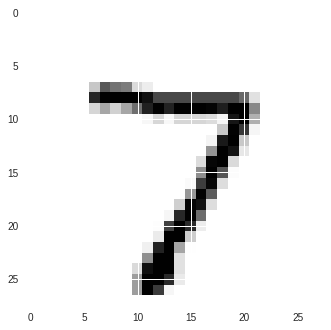

In [49]:
import matplotlib.pyplot as plt
# convert it to 28X28 format to represent it in image
img_set = np.zeros((test.shape[0],28,28))
img_set= test_X.reshape((-1,28,28))
plt.imshow(img_set[0,:,:])

In [50]:
test_y = test_y.reshape(-1,1)
test_y.shape

(10000, 1)

In [51]:
p1.score(test_y,label)

score of the model:
total =  10000
correct =  7006
multiple classification =  0
wrong =  2994
accurcy =  70.06


Vary the learning rate and number of itterations to analize the best score ..

# Training perceptron using iris data

In [0]:
from sklearn import datasets
iris_data = datasets.load_iris()
X = iris_data.data
y = iris_data.target

p2 = perceptron(alpha=0.001,iteration=120)

In [38]:
p2.train(X,y)

training complete, new weight = 
 [[ 0.03975068 -0.11752674  0.22996188 -0.02023275 -0.02492032]
 [ 0.23324344 -0.00467019 -0.08103285  0.02122344 -0.1167844 ]
 [ 0.40202337 -0.20605297 -0.39760706  0.20311932  0.75071223]]


In [40]:
label=p2.predict(X)
p2.score(y.reshape(-1,1),label)

score of the model:
total =  150
correct =  99
multiple classification =  0
wrong =  51
accurcy =  66.0


###**Note** :  As you can see that the predictions are not upto the mark for iris data. But if optimized it will definitly perform. But one limitation of perceptron is that the dataset has to be linearly seperable. as seen in this graph below###

![alt text](https://i.stack.imgur.com/Ae6qa.png)
